In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import ssl

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [6]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
def sand_pix_deer(X, y, index):
    plt.figure(figsize = (15,4))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

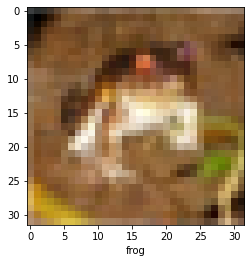

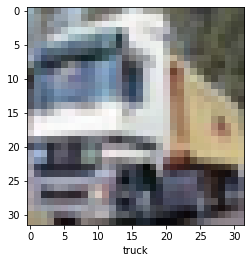

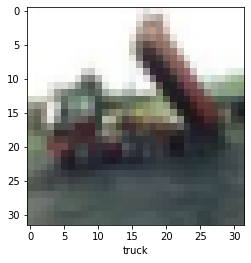

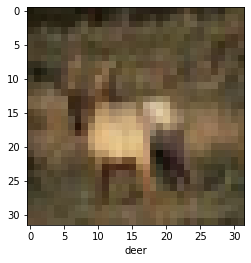

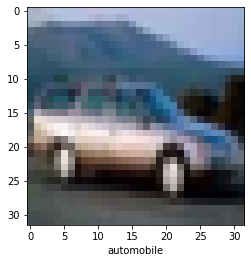

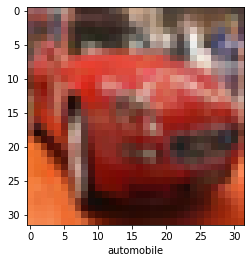

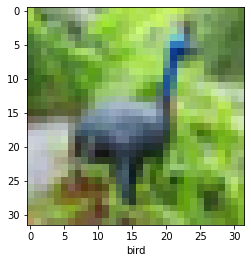

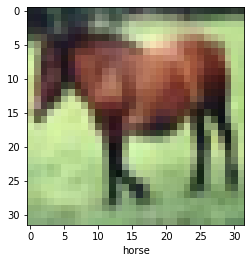

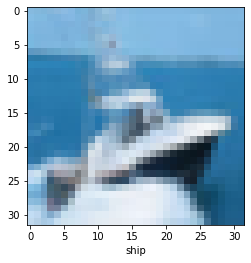

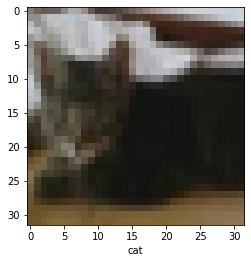

In [8]:
for i in range(10):
    sand_pix_deer(X_train, y_train, i)

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
convNN = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation='relu', input_shape= (32,32,3)),
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation='relu', input_shape= (32,32,3)),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation='relu', input_shape= (32,32,3)),
    layers.MaxPool2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])

In [11]:
convNN.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')

In [12]:
convNN.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.3984 - accuracy: 0.4948
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9984 - accuracy: 0.6527
Epoch 3/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8447 - accuracy: 0.7062
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7470 - accuracy: 0.7411
Epoch 5/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.6721 - accuracy: 0.7648
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6108 - accuracy: 0.7872
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.5526 - accuracy: 0.8075
Epoch 8/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.5099 - accuracy: 0.8205
Epoch 9/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.4538 - accuracy: 0.8404
Epoch 10/10
1563/1563 [==============================] - 73s 47m

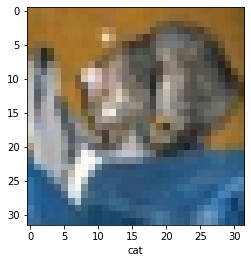

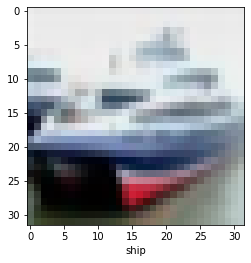

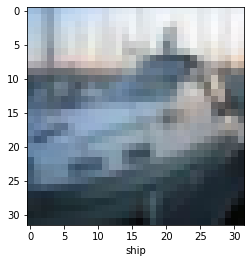

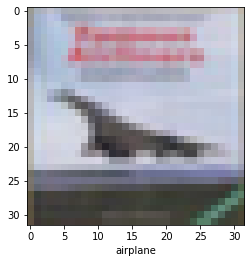

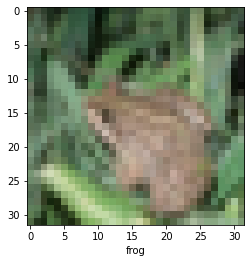

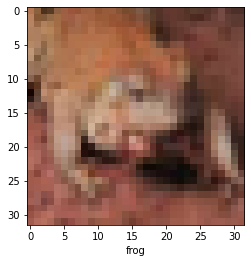

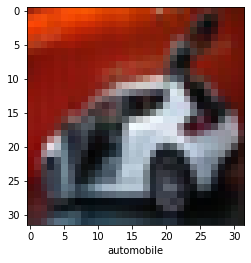

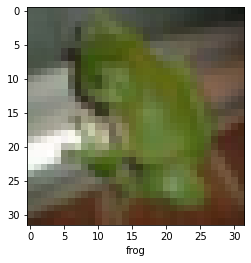

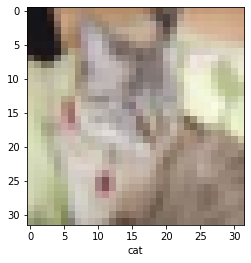

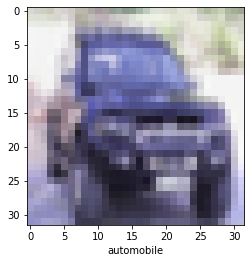

In [13]:
for i in range (10):
    sand_pix_deer(X_test, y_test, i)

In [14]:
y_pred = convNN.predict(X_test)

In [15]:
for i in range (10):
    print(classes[np.argmax(y_pred[i])])

cat
automobile
ship
airplane
cat
frog
automobile
frog
cat
automobile


In [16]:
convNN.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.8970 - accuracy: 0.7310


[0.8969873785972595, 0.7310000061988831]

Nice!